In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pwd

/home/luca/Desktop/uni/master/lab/distributed_systems/ds/predator-prey-service/src/notebooks


In [3]:
coordinates_path = "../main/resources/experiment_data/positions_2.csv"

In [7]:
df_coordinates = pd.read_csv(coordinates_path)
df_coordinates.head()

,Unnamed: 0,elapsed_time,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,...,x_6,y_6,x_7,y_7,x_8,y_8,x_9,y_9,x_10,y_10
0,0,4.103032,165.955694,117.164780,178.341303,141.012477,68.555838,82.661325,100.179295,131.150559,...,139.819672,60.185678,241.120382,167.826629,229.724438,181.276317,32.118187,61.808663,123.613164,239.387168
1,1,13.696704,167.503726,116.061527,177.496536,141.353300,70.762582,84.151846,99.134968,130.933936,...,140.664349,61.506946,239.775013,166.552977,230.589678,183.651350,32.890759,63.666907,122.944939,238.982746
2,2,24.813294,166.447114,117.823024,177.752518,140.626724,72.327044,86.745808,98.881915,130.056138,...,141.977914,62.474978,238.217038,165.091807,233.097956,184.354533,35.454631,64.621678,122.825934,238.233351
3,3,35.328997,168.368140,116.801719,175.990389,141.341274,74.454528,88.035571,97.110411,129.605475,...,142.907362,64.051218,236.157884,162.961836,233.934062,187.259027,36.341467,67.330409,123.398335,238.508704
4,4,45.966481,167.004580,119.109528,176.962383,139.264296,75.464512,89.723799,96.744925,127.723924,...,144.523184,65.085148,233.547024,160.424757,236.657513,187.975512,39.562746,68.453823,123.494481,239.189339


In [8]:
len(df_coordinates)

89

In [9]:
x_coord = [col for col in df_coordinates.columns if col.startswith("x")]
y_coord = [col for col in df_coordinates.columns if col.startswith("y")]

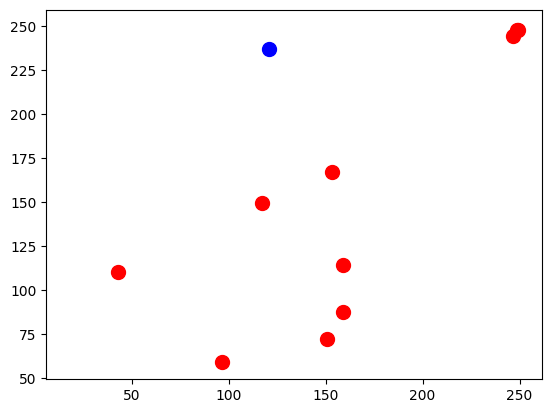

In [10]:

n = len(df_coordinates)

num_predators = 10
num_preys = 1

from celluloid import Camera

camera = Camera(plt.figure())
for i in range(n):
    x = df_coordinates[x_coord].loc[i]
    y = df_coordinates[y_coord].loc[i]
    
    x_pred, y_pred = x[:num_predators], y[:num_predators]
    x_prey, y_prey = x[num_predators:], y[num_predators:]
    
    plt.scatter(x_pred, y_pred, c='red', s=100, marker='o')
    plt.scatter(x_prey, y_prey, c='blue', s=100, marker='o')     
    
    camera.snap()
anim = camera.animate(blit=True)
anim.save('scatter.mp4')